<a href="https://colab.research.google.com/github/fedhere/MLPNS2021/blob/main/HW5_LazyLearning/knn_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import json
import os
%pylab inline

pl.style.use("bmh")


Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [3]:
cd gdrive/My\ Drive/


/content/gdrive/My Drive


In [4]:
cd MLPNS2021/

/content/gdrive/My Drive/MLPNS2021


In [5]:
!pip install kaggle


In [6]:
!ls 


 10802534_761689917241346_821292660_n.jpg
 country_pop_clean.csv
 country_pop.csv
 country_pop_final.csv
 grb050525A.csv
 healthcare-dataset-stroke-data.csv
 kaggle.json
 kalbar_drone_190113-768x512.jpg
 Madrid.jpg
 NYC_Women_s_Resource_Network_Database.csv
'SP.POP.TOTL?downloadformat=excel'
'SP.POP.TOTL?downloadformat=excel.1'
'SP.POP.TOTL?downloadformat=excel.2'
'SP.POP.TOTL?downloadformat=excel.3'
'SP.POP.TOTL?downloadformat=excel.4'
'SP.POP.TOTL?downloadformat=excel.5'
 stroke-prediction-dataset.zip


In [7]:
!chmod 600 kaggle.json

In [8]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [9]:
!kaggle datasets  list -s stroke


ref                                                            title                                            size  lastUpdated          downloadCount  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  
fedesoriano/stroke-prediction-dataset                          Stroke Prediction Dataset                        67KB  2021-01-26 19:29:28          22780  
mazharkarimi/heart-disease-and-stroke-prevention               Heart Disease and Stroke Prevention               1MB  2018-05-14 10:36:48           7628  
google/tinyquickdraw                                           QuickDraw Sketches                               11GB  2018-04-18 19:38:04           2975  
valkling/tappy-keystroke-data-with-parkinsons-patients         Tappy Keystroke Data with Parkinson's Patients   96MB  2018-02-04 05:41:47           1021  
mpwolke/cusersmarildownloadsstrokecsv                          Stroke 

In [10]:
!kaggle datasets download fedesoriano/stroke-prediction-dataset   



stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!ls

 10802534_761689917241346_821292660_n.jpg
 country_pop_clean.csv
 country_pop.csv
 country_pop_final.csv
 grb050525A.csv
 healthcare-dataset-stroke-data.csv
 kaggle.json
 kalbar_drone_190113-768x512.jpg
 Madrid.jpg
 NYC_Women_s_Resource_Network_Database.csv
'SP.POP.TOTL?downloadformat=excel'
'SP.POP.TOTL?downloadformat=excel.1'
'SP.POP.TOTL?downloadformat=excel.2'
'SP.POP.TOTL?downloadformat=excel.3'
'SP.POP.TOTL?downloadformat=excel.4'
'SP.POP.TOTL?downloadformat=excel.5'
 stroke-prediction-dataset.zip


In [12]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
!ls

 10802534_761689917241346_821292660_n.jpg
 country_pop_clean.csv
 country_pop.csv
 country_pop_final.csv
 grb050525A.csv
 healthcare-dataset-stroke-data.csv
 kaggle.json
 kalbar_drone_190113-768x512.jpg
 Madrid.jpg
 NYC_Women_s_Resource_Network_Database.csv
'SP.POP.TOTL?downloadformat=excel'
'SP.POP.TOTL?downloadformat=excel.1'
'SP.POP.TOTL?downloadformat=excel.2'
'SP.POP.TOTL?downloadformat=excel.3'
'SP.POP.TOTL?downloadformat=excel.4'
'SP.POP.TOTL?downloadformat=excel.5'
 stroke-prediction-dataset.zip


In [14]:
datain = pd.read_csv("healthcare-dataset-stroke-data.csv")
datain

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
datain.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
datain.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
strokeInput = datain[["age", "hypertension", "avg_glucose_level", "bmi"]]

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(strokeInput, 
                    datain.stroke, test_size=0.2, random_state=1)
X_train.shape, y_train.shape

((4088, 4), (4088,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train, y_train)

ValueError: ignored

In [ ]:
datain.isna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
cleanstrokeInput = strokeInput.dropna(subset=["bmi"], axis=0)
cleanstrokeInput.shape

(4909, 4)

In [ ]:
target = datain[["bmi","stroke"]].dropna(subset=["bmi"], axis=0).stroke

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cleanstrokeInput, 
                    target, test_size=0.2, random_state=1)
X_train.shape, y_train.shape

((3927, 4), (3927,))

# by hand

In [ ]:
X_train.iloc[0]

age                   38.00
hypertension           0.00
avg_glucose_level    151.26
bmi                   20.60
Name: 4412, dtype: float64

In [ ]:
target.iloc[0]

1

In [ ]:
print("lost in cleaning: %.2f of the data"%(1 - cleanstrokeInput.shape[0] / strokeInput.shape[0]))

lost in cleaning: 0.04 of the data


In [ ]:
import sklearn.preprocessing
Xscaled = sklearn.preprocessing.scale(X_train, axis=0)

In [ ]:
import scipy as sp

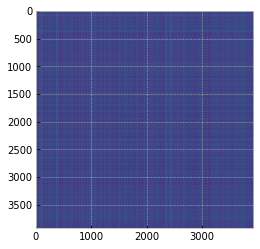

In [ ]:
import pylab as pl
pl.imshow(sp.spatial.distance.squareform(sp.spatial.distance.pdist(Xscaled)))

(3927,)

array([   0, 1902, 2564, ...,  420,  931,   99])

array([ 0.        ,  0.34004583,  0.35266319, ...,  6.70151299,
        8.33000641, 10.66323764])

0       1
2007    0
2689    0
1055    0
1727    0
Name: stroke, dtype: int64

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print ("prediction score %.2f"%knn.score(X_test, y_test))


prediction score 0.94


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, 
          datain[["age", 
        "hypertension", "avg_glucose_level", "bmi"]].dropna(subset=["bmi"],
                                                                       axis=0), 
                    datain[["bmi","stroke"]].dropna(subset=["bmi"],
                                                                       axis=0).stroke, cv=5)
print (" CV average prediction score %.2f"%cv_scores.mean())

 CV average prediction score 0.95


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(datain[["age", 
        "hypertension", "avg_glucose_level", "bmi"]].dropna(subset=["bmi"],
                                                                       axis=0), 
                    datain[["bmi","stroke"]].dropna(subset=["bmi"],
                                                                       axis=0).stroke)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print ("prediction score %.2f"%knn_gscv.score(X_test, y_test))

prediction score 0.95


In [ ]:
sklearn.metrics.confusion_matrix(y_test, knn_gscv.predict(X_test))

array([[931,   0],
       [ 51,   0]])

In [ ]:
knn_gscv.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
.